First Attempt at Problem... Will use Gradient Boosting Regressor...
Let's see where it goes.
We'll tune the parameter tomorrow

In [0]:
import numpy as np
import pandas as pd

In [0]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [39]:
train_data.head(5)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [40]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [41]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [0]:
X = train_data.iloc[:, 1:23]
X_test = test_data.iloc[:, 1:23]
y = train_data.iloc[:, -1]

In [55]:
from sklearn.decomposition import PCA
all_columns = X.columns.values
all_columns

array(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Hometown', 'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance',
       'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'],
      dtype=object)

In [56]:
X.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
dtype: object

In [0]:
X = X.drop("VAR2", 1)
X_test = X_test.drop("VAR2", 1)
X = X.drop("VAR4", 1)
X_test = X_test.drop("VAR4", 1)

In [0]:
non_categorical = ['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
                             'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
                             'Work_Life_balance', 'VAR1', 'VAR3', 'VAR5', 'VAR6',
                             'VAR7']

categorical = [value for value in all_columns if value not in non_categorical]

In [0]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

X = imputer.fit_transform(X)
X_test = imputer.fit_transform(X_test)

#X = np.log(X)
#X_test = np.log(X_test)
#y = np.log(y)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [161]:
from sklearn.decomposition import PCA

pca = PCA(whiten = True)
pca.fit(X)
pca.fit(X_test)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.04752688, 0.09277177, 0.13739795, 0.17954109, 0.21190348,
       0.24363197, 0.27443766, 0.30507831, 0.33516774, 0.36354543,
       0.39161857, 0.41886062, 0.44572642, 0.4721883 , 0.49859537,
       0.52426792, 0.5496003 , 0.57478147, 0.59988682, 0.62444654,
       0.64882543, 0.67283003, 0.69663847, 0.72005717, 0.7432346 ,
       0.76591633, 0.78844413, 0.81074349, 0.83259237, 0.85435291,
       0.87596182, 0.89693901, 0.91762789, 0.93807171, 0.95817091,
       0.97777811, 0.99736411, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

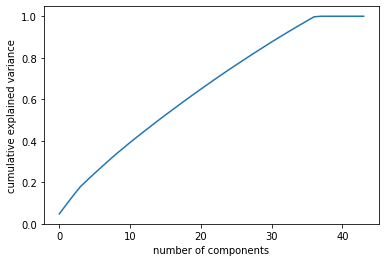

In [162]:
import matplotlib.pyplot as plt 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

pca = PCA(n_components=35,whiten=True)
pca = pca.fit(X)
dataPCA = pca.transform(X)

pca = pca.fit(X_test)
test_pca = pca.fit(X_test)
test_dataPCA = test_pca.transform(X_test) 

In [0]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [163]:
print(dataPCA.shape, y.shape, test_dataPCA.shape)

(7000, 35) (7000,) (3000, 35)


In [164]:
cv = KFold(n_splits=5,shuffle=True,random_state=45)

parameters = {'n_estimators': [50],
              'learning_rate' : [.004],
              'max_depth': [4, 5, 6],
              'max_features': ['log2'],
              'criterion' : ['mse']}

clf = GradientBoostingRegressor(verbose = 1)
r2 = make_scorer(r2_score)
grid_obj = GridSearchCV(clf, parameters, cv=cv,scoring=r2)
grid_fit = grid_obj.fit(dataPCA, y)
best_clf = grid_fit.best_estimator_ 

best_clf.fit(dataPCA,y)

      Iter       Train Loss   Remaining Time 
         1           0.0352            0.36s
         2           0.0352            0.33s
         3           0.0352            0.31s
         4           0.0352            0.30s
         5           0.0352            0.29s
         6           0.0352            0.29s
         7           0.0352            0.28s
         8           0.0352            0.29s
         9           0.0352            0.28s
        10           0.0352            0.27s
        20           0.0352            0.19s
        30           0.0352            0.13s
        40           0.0351            0.06s
        50           0.0351            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.0339            0.30s
         2           0.0339            0.30s
         3           0.0339            0.29s
         4           0.0339            0.29s
         5           0.0339            0.28s
         6           0.0339            0.28s
        

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.004, loss='ls', max_depth=4,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [165]:
preds = best_clf.predict(test_dataPCA)
preds

array([0.19008115, 0.1887621 , 0.18999   , ..., 0.18834249, 0.19017019,
       0.18909918])

In [0]:
rows = zip(test_data['Employee_ID'], preds)
import csv
with open('pca_xgb.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

In [0]:
df = pd.read_csv('pca_xgb.csv', header=None)
df.rename(columns={0: 'Employee_ID', 1: 'Attrition_rate'}, inplace=True)
df.to_csv('pca_xgb.csv', index=False) # save to new csv file